In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/EGCO486 Image Processing/Week 4/'
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
def Myimaver(img):
  x, y = img[0].shape
  new_img = np.zeros((x, y), np.float32)
  for i in range(len(img)):
    new_img += img[i]
  new_img = ((new_img/len(img))).astype('int32')
  plt.figure(figsize=(24, 32))
  plt.subplot(1,2,1)
  plt.title('Old image')
  plt.imshow(img[0], cmap='gray')
  plt.subplot(1,2,2)
  plt.title('Averaged image')
  plt.imshow(new_img, cmap = 'gray')
  return

In [ ]:
p=[]
for i in range(16):
  temp = cv2.imread(path + 'p' + str(i+1) + '.bmp')
  p.append(temp[:, :, 0])

print(p[0].shape)

(240, 320)


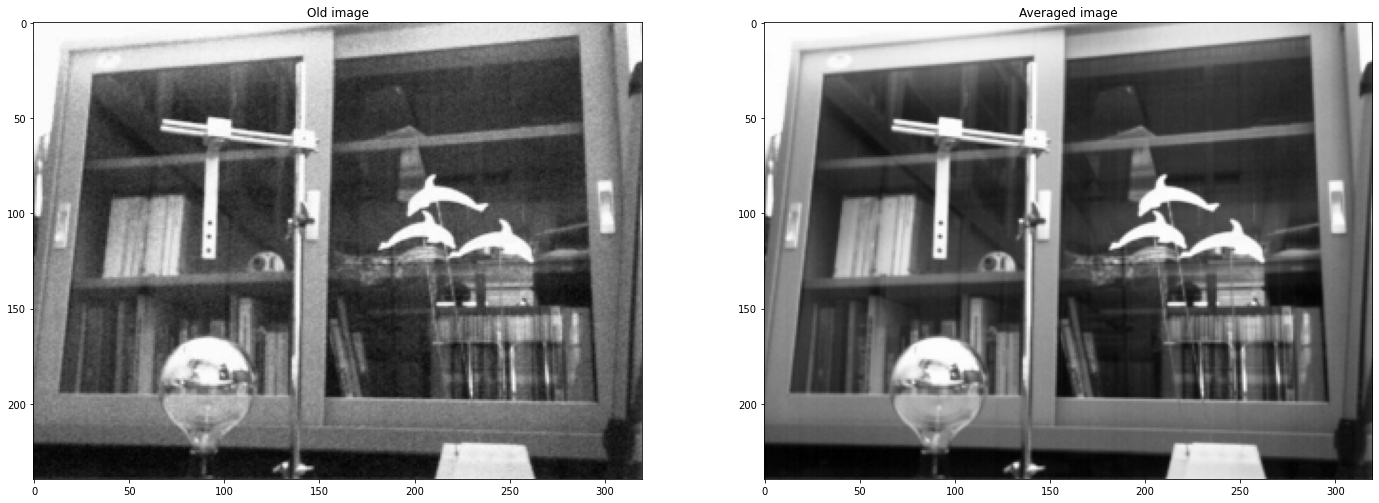

In [ ]:
Myimaver(p)

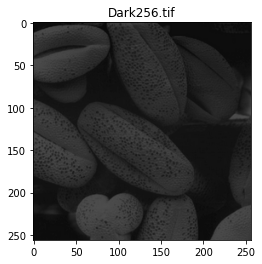

In [ ]:
d = cv2.imread(path + 'Dark256.tif')
plt.imshow(d, cmap = 'gray'), plt.title('Dark256.tif');

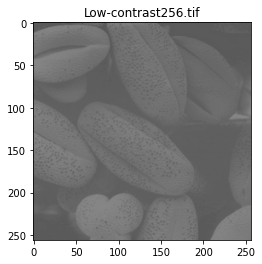

In [ ]:
l = cv2.imread(path + 'Low-contrast256.tif')
plt.imshow(l, cmap = 'gray') , plt.title('Low-contrast256.tif');

In [ ]:
print(dark.shape)
print(low.shape)

(256, 256, 3)
(256, 256, 3)


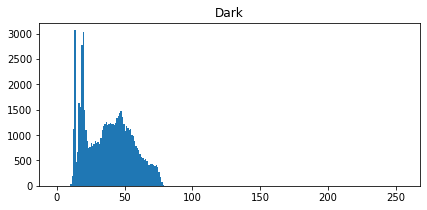

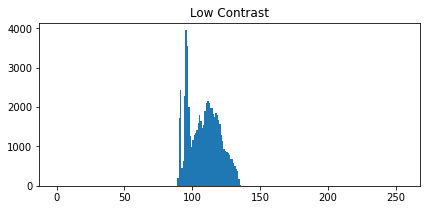

In [ ]:
plt.figure(figsize=(15, 3)), plt.subplot(1, 2, 1), plt.title('Dark'), plt.hist(dark.flatten().astype('int32'), bins = range(256));
plt.figure(figsize=(15, 3)), plt.subplot(1, 2, 2), plt.title('Low Contrast'), plt.hist(low.flatten().astype('int32'), bins = range(256));

In [ ]:
def Myhisteq(org, img, name):
  s = np.zeros(256, np.float32)
  mn = 256*256
  process_img = img.copy().flatten()
  for i in range(256):
    sum_pr = 0
    for j in range(i+1):
      sum_pr += (((process_img == j).sum())/mn)
    s[i] = (255 * sum_pr)
    # if s[i] >= 0.5:
    #   s[i] = 1
    # else:
    #   s[i] = 0
  
  new_img = img.copy()
  for i in range(256):
    for j in range(256):
      new_img[i][j] = s[img[i][j]]
      
  new_img = new_img.astype('int32')

  plt.subplot(1,2,1), plt.title(name), plt.imshow(org, cmap='gray')
  plt.subplot(1, 2, 2), plt.title('Histogram of Original image'), plt.hist(img.flatten().astype('int32'), bins = range(256));
  plt.show()
  plt.subplot(1,2,1), plt.title('Equalize ' + name), plt.imshow(new_img, cmap='gray')
  plt.subplot(1, 2, 2), plt.title('Histogram of Original image'), plt.hist(new_img.flatten().astype('int32'), bins = range(256));
  plt.show()
  return

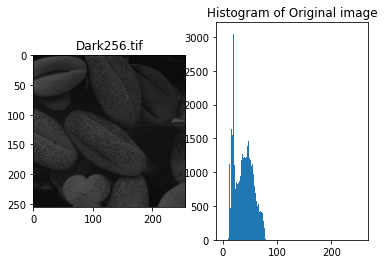

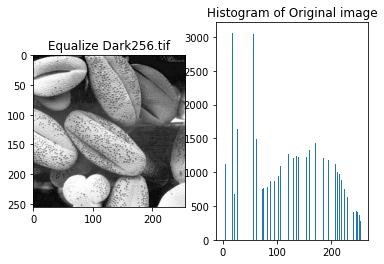

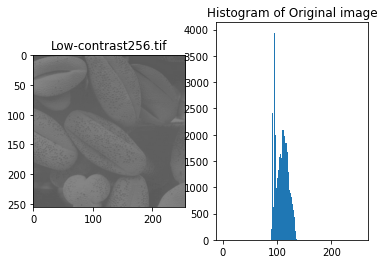

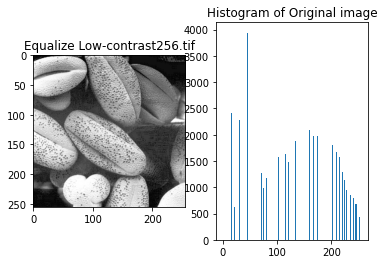

In [ ]:
Myhisteq(d, dark, 'Dark256.tif')
Myhisteq(l, low, 'Low-contrast256.tif')